# Iris Classification

**Objective :** To classify different species of the Iris flower with the help of features provided.

For this project we will be using the following UCI dataset- https://archive.ics.uci.edu/ml/datasets/Iris
It includes three iris species with 50 samples and some physical properties about each flower. 


Here are the features represented through columns :
<br>

**Input variables**
<br>
1 - Id
<br>
2 - sepal length in cm
<br>
3 - sepal width in cm
<br>
4 - petal length in cm
<br>
5 - petal width in cm
<br>

**Output variable**<br>
6 - species:
- Iris Setosa
- Iris Versicolour
- Iris Virginica



## Steps :
1. Importing Libraries
2. Exploring the Dataset
3. Exploratory Data Analysis
4. Data Preprocessing
5. Model Building
> * Logistic regression
> * Decision tree
> * KNN
> * SVM
> * Naive Bayes Classification
> * Random forest
> * XGBoost
6. Performance Comparison
7. Conclusion

## 1. Import Libraries
Import the necessary packages to process or plot the data

In [1]:
import numpy as np
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Get the Data

Use pandas to read iris.csv as a dataframe called iris

In [2]:
iris = pd.read_csv('Iris.csv')

## 2. Exploring the Dataset

**Check distribution of data**
<br>
Use head() method

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**Check information about the columns**
<br>
Use info() method

In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


So there are no null values available in the data set

## 3. Exploratory Data Analysis

Let's do some data visualization! Feel free to use whatever library you want. 

Note - Directions for a few plots are given below, we encourage you to explore further for more insights into the data!


**Use a countplot on the 'Species' column to find how the species are distributed!**

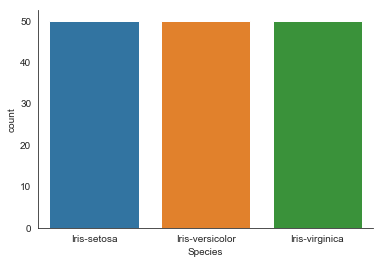

In [5]:
sns.set_style('white')
sns.countplot(x="Species", data=iris)
sns.despine()

There is an equal distribution of all three species.

**Plot a correlation matrix to study the correlation between features!**

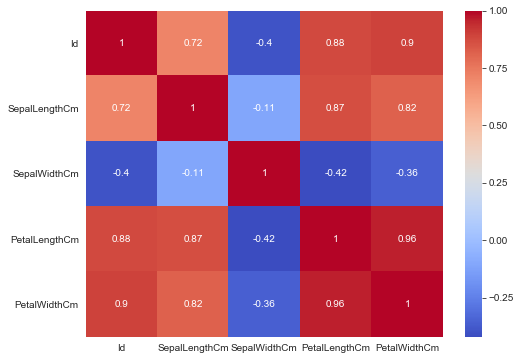

In [6]:
iris.corr()
plt.figure(figsize=(8,6))
sns.heatmap(iris.corr(),cmap='coolwarm',annot=True)

**Create a scatter plot based on petal length and width.**

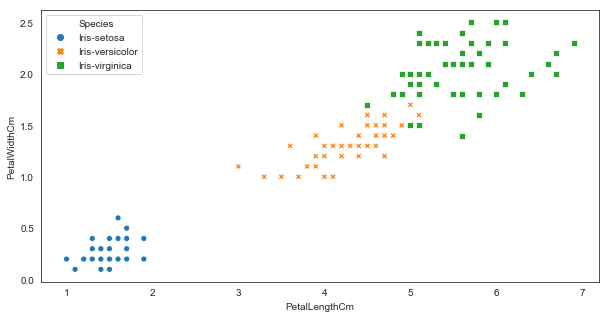

In [7]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="PetalLengthCm", y="PetalWidthCm", hue="Species", style="Species", data = iris)

Based on petal properties, it is seen that we can easily classify setosa from versicolor and virginica.

**Now plot one again based on sepal length and width.**

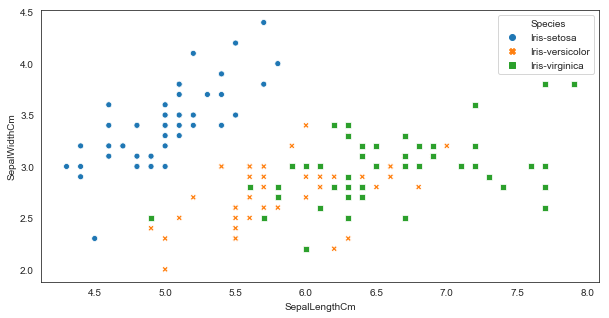

In [8]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="SepalLengthCm", y="SepalWidthCm", hue="Species", style="Species", data = iris)

Again, setosa appears more differentiable based on sepal characteristics unlike versicolor and virginica.

**Use a boxplot to find out the distribution of petal width across the 3 species**

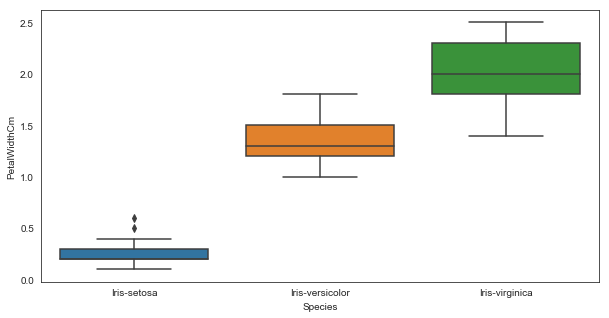

In [9]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Species", y="PetalWidthCm", data=iris)

**Use a boxplot to find out the distribution of petal length across the 3 species**

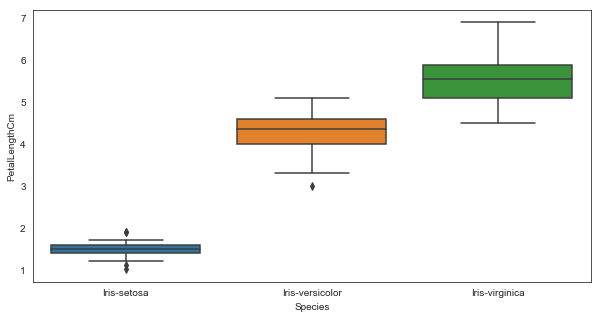

In [10]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Species", y="PetalLengthCm", data=iris)

**Use a boxplot to find out the distribution of sepal width across the 3 species**

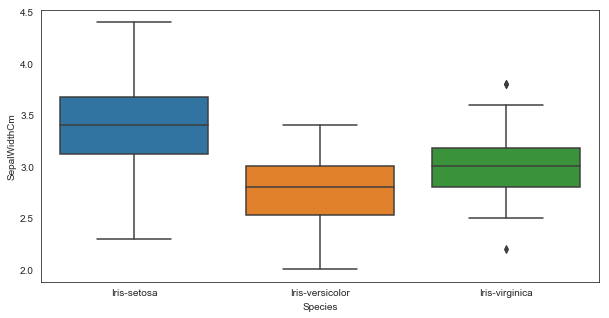

In [11]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Species", y="SepalWidthCm", data=iris)

**Use a boxplot to find out the distribution of sepal length across the 3 species**

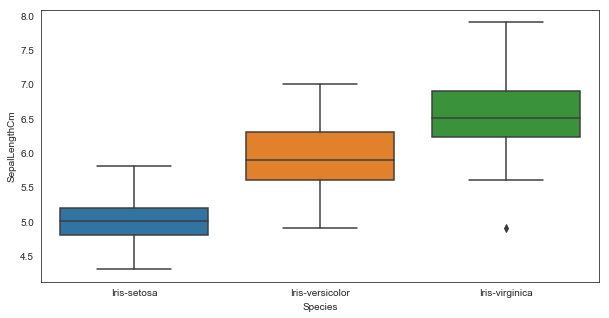

In [12]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Species", y="SepalLengthCm", data=iris)

- From the above four plots we can see that the distribution of setosa < vericolor < virginica.
- There are a few outliers which can be explained by the scatter plot.

## 4. Data Preprocessing

Notice that the species column has entries in the form of species names. <br>

**We will convert those species names to categorical values using label encoding.**


First, let's seperate the dataset as output variable (species name) and feature variabes

In [13]:
#Set the 'Species' column to y
#Drop the 'Species' and 'Id' column from the dataframe and set the remaining dataframe to x

x = iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y = iris['Species']

Now lets assign labels to our output variable using **LabelEncoder**

In [14]:
#Import LabelEncoder and create an instance named encoder

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [15]:
#Use .fit_transform method to fit encoder to y and return encoded labels

y = encoder.fit_transform(y)

In [16]:
#Print out y

y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

As you can see Iris-setosa Iris-versicolor Iris-virginica are converted to 0, 1, 2 respectively


**Train Test Split**

In [17]:
#Import train_test_split

from sklearn.model_selection import train_test_split

#Split the data set into training data and testing data in a 7:3 ratio

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 101)

## 5. Model Building

**Since it is a classification problem we will be using the following ML algorithms :**<br>
Logistic regression<br>
Decision tree<br>
KNN<br>
SVM<br>
Naive Bayes Classification<br>
Random forest<br>
XGBoost<br>

### Logistic regression

<img src="https://image.slidesharecdn.com/logitregression-161121215510/95/intro-to-logistic-regression-4-638.jpg?cb=1479765630">

Logistic regression is a statistical method for analyzing a dataset in which there are one or more independent variables that determine an outcome. The outcome is measured with a dichotomous variable (in which there are only two possible outcomes). 

In [18]:
#Import LogisticRegression

from sklearn.linear_model import LogisticRegression

#Create an instance of LogisticRegression() called lr_model and fit it to the training data.

lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)

#Create predictions from the test set and name the result lr_predict

lr_predict = lr_model.predict(x_test)

In [19]:
#print out the accuracy score for LogisticRegression
#Don't forget to import accuracy_score from sklearn.metrics!  

from sklearn.metrics import  accuracy_score

print('Logistic Regression - ',accuracy_score(lr_predict,y_test))

Logistic Regression -  0.9555555555555556


### Random Forest Classifier

<img src="https://i1.wp.com/dataaspirant.com/wp-content/uploads/2017/04/Random-Forest-Introduction.jpg?resize=690%2C345">


Random Forest is considered to be a panacea of all data science problems. On a funny note, when you can’t think of any algorithm (irrespective of situation), use random forest!

Random Forest is a versatile machine learning method capable of performing both regression and classification tasks. It also undertakes dimensional reduction methods, treats missing values, outlier values and other essential steps of data exploration, and does a fairly good job. It is a type of ensemble learning method, where a group of weak models combine to form a powerful model.

In [20]:
#Import RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

#Create an instance of RandomForestClassifier() called rfc_model and fit it to the training data.

rfc_model = RandomForestClassifier(max_depth=3)
rfc_model.fit(x_train,y_train)

#Create predictions from the test set and name the result rfc_predict

rfc_predict = rfc_model.predict(x_test)

In [21]:
#print out the accuracy score for RandomForest

print('Random Forest - ',accuracy_score(rfc_predict,y_test))

Random Forest -  0.9555555555555556


### KNN

<img src="http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/Knn_k1_z96jba.png">

K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions). KNN has been used in statistical estimation and pattern recognition already in the beginning of 1970's as a non-parametric technique.

In [22]:
#Import KNeighborsClassifier

from sklearn.neighbors import KNeighborsClassifier

#Create an instance of KNeighborsClassifier() with no. of neighbours = 3 called knn_model and fit it to the training data.

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train,y_train)

#Create predictions from the test set and name the result knn_predict

knn_predict = knn_model.predict(x_test)

In [23]:
#print out the accuracy score for KNN

print('knn - ',accuracy_score(knn_predict,y_test))


knn -  1.0


### Support Vector Machine

<img src="https://cdn-images-1.medium.com/max/1600/1*TudH6YvvH7-h5ZyF2dJV2w.jpeg">

“Support Vector Machine” (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges. However, it is mostly used in classification problems. In this algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiate the two classes very well.

Support Vectors are simply the co-ordinates of individual observation. Support Vector Machine is a frontier which best segregates the two classes (hyper-plane/ line).

In [24]:
#Import SVC

from sklearn.svm import SVC

#Create an instance of SVC() called svm_model and fit it to the training data.

svm_model = SVC(kernel='linear')
svm_model.fit(x_train,y_train)

#Create predictions from the test set and name the result svm_predict

svc_predict = svm_model.predict(x_test)

In [25]:
#print out the accuracy score for SVM

print('SVM - ',accuracy_score(svc_predict,y_test))

SVM -  1.0


### Naive Bayes Classification

<img src="https://helloacm.com/wp-content/uploads/2016/03/Bayes_rule.png">

Naive Bayes is a simple, yet effective and commonly-used, machine learning classifier. It is a probabilistic classifier that makes classifications using the Maximum A Posteriori decision rule in a Bayesian setting. It can also be represented using a very simple Bayesian network. Naive Bayes classifiers have been especially popular for text classification, and are a traditional solution for problems such as spam detection.

In [26]:
#Import GaussianNB

from sklearn.naive_bayes import GaussianNB

#Create an instance of GaussianNB() called nb_model and fit it to the training data.

nb_model = GaussianNB()
nb_model.fit(x_train,y_train)

#Create predictions from the test set and name the result nb_predict
nb_predict = nb_model.predict(x_test)

In [27]:
#print out the accuracy score for NaiveBayes

print('Naive bayes - ',accuracy_score(nb_predict,y_test))

Naive bayes -  0.9555555555555556


### Decision Tree

<img src="https://annalyzin.files.wordpress.com/2016/07/decision-trees-titanic-tutorial.png">

Decision tree is a type of supervised learning algorithm (having a pre-defined target variable) that is mostly used in classification problems. It works for both categorical and continuous input and output variables. In this technique, we split the population or sample into two or more homogeneous sets (or sub-populations) based on most significant splitter / differentiator in input variables

In [28]:
#Import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

#Create an instance of DecisionTreeClassifier() called dt_model with 3 nodes and fit it to the training data.

dt_model = DecisionTreeClassifier(max_leaf_nodes=3)
dt_model.fit(x_train,y_train)

#Create predictions from the test set and name the result dt_sgd
dt_predict = dt_model.predict(x_test)


In [29]:
#print out the accuracy score for DecisionTree

print('Decision Tree - ',accuracy_score(dt_predict,y_test))

Decision Tree -  0.9333333333333333


### XGBoost

<img src="https://i.imgur.com/e7MIgXk.png">

The beauty of this powerful algorithm lies in its scalability, which drives fast learning through parallel and distributed computing and offers efficient memory usage.

It’s no wonder then that CERN recognized it as the best approach to classify signals from the Large Hadron Collider. This particular challenge posed by CERN required a solution that would be scalable to process data being generated at the rate of 3 petabytes per year and effectively distinguish an extremely rare signal from background noises in a complex physical process. XGBoost emerged as the most useful, straightforward and robust solution.

In [30]:
#Import XGBClassifier

import xgboost as xgb
from xgboost.sklearn import XGBClassifier

#Create an instance of XGBClassifier() called xg_model and fit it to the training data.

xg_model = xgb.XGBClassifier()
xg_model = xg_model.fit(x_train,y_train)

#Print out the model score applied on the test set

xg_model.score(x_test, y_test)

0.9777777777777777

## 6. Comparison

**You will now create an accuracy table to see all model performances in one glance**

Your first task will be to create 3 lists as mentioned below.

In [31]:
#Create an empty list named 'scores'

scores = []

In [32]:
#Create a list named 'models' with the following elements - LogisticRegression(), SVC(kernel='linear'), GaussianNB(), DecisionTreeClassifier(max_leaf_nodes=3), RandomForestClassifier(max_depth=3), KNeighborsClassifier(n_neighbors=3), xgb.XGBClassifier()

models = [LogisticRegression(), SVC(kernel='linear'), GaussianNB(), DecisionTreeClassifier(max_leaf_nodes=3), RandomForestClassifier(max_depth=3), KNeighborsClassifier(n_neighbors=3), xgb.XGBClassifier()]

In [33]:
#Create a list named 'classifiers' comprising of names of the algorithms in the list 'models' which you created above. 
#For e.g. SVC will be 'Support Vector Machine' and GuassianNB will be 'Naive Bayes'

classifiers = ["Logistic Regression","Support Vector Machine","Naive Bayes","Decision Tree","Random Forest","KNN","XGBoost"]

Now you will use a for loop to implement the algorithms listed in 'models' above and append the accuracy score for each model to the list 'scores'.<br>
Refer to the line - wise format of the loop which is given below

**for i in models:**

     Line 1 - set the value of a variable named 'current_model' equal to i
     Line 2 - fit current_model to the training data
     Line 3 - create predictions for the test set and store it in a variable named 'current_prediction'
     Line 4 - append the value accuracy_score(current_prediction,y_test) to the list 'scores'
     


In [34]:
for i in models :
    current_model = i
    current_model.fit(x_train,y_train)
    current_prediction = current_model.predict(x_test)
    scores.append(accuracy_score(current_prediction,y_test))

Now create a dataframe named 'models_accuracy' with the data parameter set to 'scores' and index parameter set to 'classifiers'

In [35]:
models_accuracy = pd.DataFrame(data = scores, index = classifiers)

Congratulations! Print models_accuracy to see the dataframe you just created!

In [36]:
print(models_accuracy)

                               0
Logistic Regression     0.955556
Support Vector Machine  1.000000
Naive Bayes             0.955556
Decision Tree           0.933333
Random Forest           0.977778
KNN                     1.000000
XGBoost                 0.977778
